In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [15]:
flist = glob.glob('quantification/*.csv')

In [28]:
df = pd.DataFrame()

for file in flist:
    tmp = pd.read_csv(file, index_col=0)
    tmp['GPCR'] = np.full(len(tmp),file[15:-6])
    tmp['channel'] = np.full(len(tmp),file[-5:-4])
    df = pd.concat([df,tmp])
df_norm = pd.DataFrame(df.loc[df['channel']=='G','GPCR'])
df_norm['Norm'] = df.loc[df['channel']=='R','Mean'].values/ df.loc[df['channel']=='G','Mean'].values
df_norm

GPCR      Norm
                  
1   DRD1  1.032898
2   DRD1  0.146188
3   DRD1  0.443736
4   DRD1  0.049814
5   DRD1  0.042326
..   ...       ...
46  HTR7  7.139093
47  HTR7  2.668146
48  HTR7  3.358057
49  HTR7  3.454784
50  HTR7  2.330956

[694 rows x 2 columns]

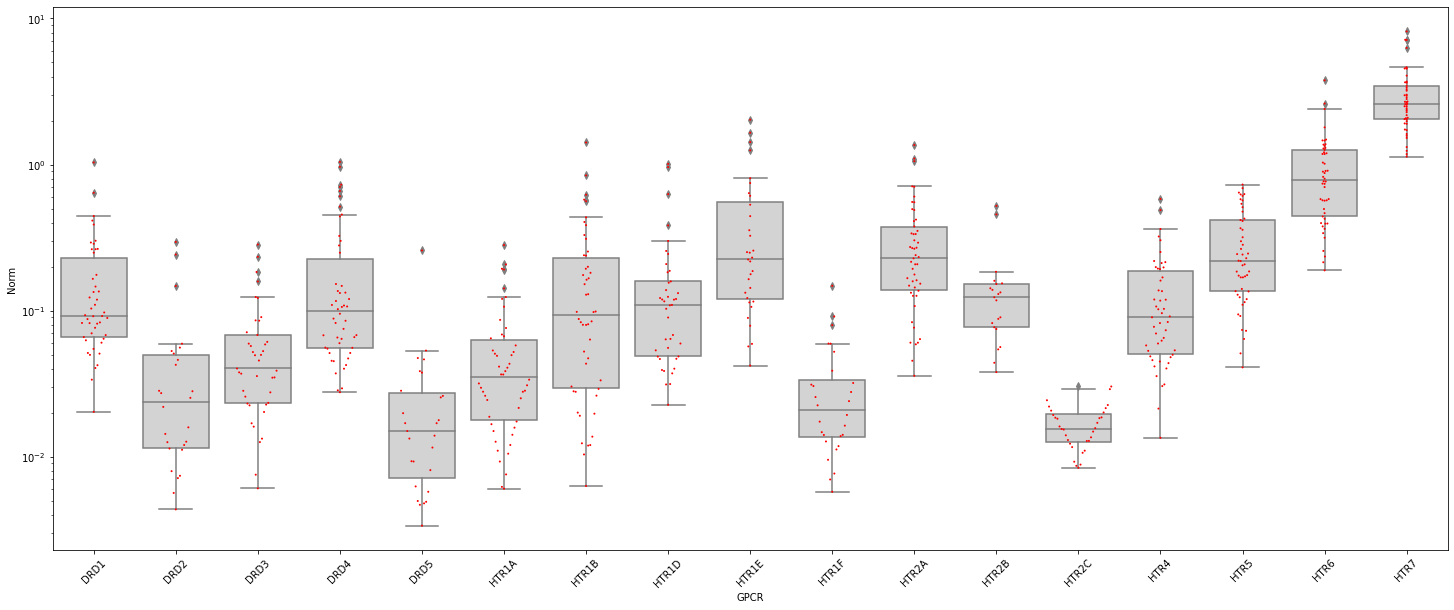

In [49]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df_norm,x='GPCR',y='Norm', color='lightgray')
sns.swarmplot(data=df_norm,x='GPCR',y='Norm', color='red',size=2)
plt.xticks(rotation=45)
plt.yscale('log')
plt.savefig('quantification.pdf')
plt.savefig('quantification.jpg')
plt.show()

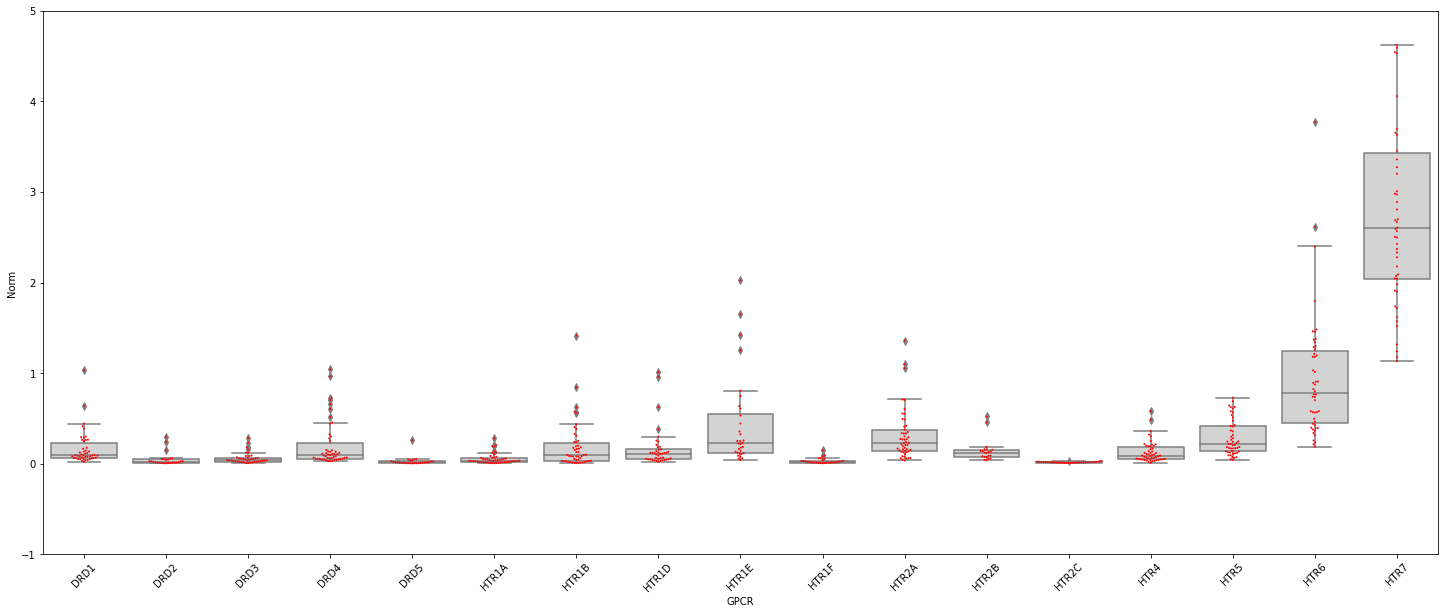

In [52]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df_norm,x='GPCR',y='Norm', color='lightgray')
sns.swarmplot(data=df_norm,x='GPCR',y='Norm', color='red',size=2)
plt.xticks(rotation=45)
plt.ylim(-1,5)
plt.savefig('quantification_linear.pdf')
plt.savefig('quantification_linear.jpg')
plt.show()